In [2]:
pip install tensorflow keras scikit-learn matplotlib pandas pillow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np (#mathamatical  operation)
import pandas as pd (#maniplate the data)
import tensorflow as tf (#deep learning library)
import os

In [4]:
import cv2 (#complex image processing , and it is real time application)
from PIL import Image (# image loading, resizing, and conversions)


In [5]:
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt  (#visualizing the model’s performance (e.g., accuracy and loss)
import seaborn as sns (#visualization library)
%matplotlib inline(#display plots directly in the notebook)

In [40]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [14]:
import time
import datetime

In [74]:
train=pd.read_csv(r"C:\Users\nivedhitha\Downloads\traffic signs detection using CNN\Train.csv")

In [75]:
train

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png


In [6]:
test=pd.read_csv(r"C:\Users\nivedhitha\Downloads\traffic signs detection using CNN\Test.csv")

In [7]:
test

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png


In [77]:
meta=pd.read_csv(r"C:\Users\nivedhitha\Downloads\traffic signs detection using CNN\Meta.csv")

In [78]:
meta.count()

Path       43
ClassId    43
ShapeId    43
ColorId    43
SignId     42
dtype: int64

In [18]:
def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today()

In [7]:
data = []
labels = []
classes = 43
cur_path = os.getcwd() (#current working directory)

In [8]:
cur_path

'C:\\Users\\nivedhitha\\Downloads\\traffic signs detection using CNN'

In [10]:
for i in range(classes):                                  (#this loop iterate the 43)
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except exception as e:
            print(e)


In [11]:
data=np.array(data)
labels=np.array(labels)

In [13]:
labels

array([ 0,  0,  0, ..., 42, 42, 42])

In [14]:
print(data.shape, labels.shape)

(78418, 30, 30, 3) (78418,)


In [15]:
# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [16]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(62734, 30, 30, 3) (15684, 30, 30, 3) (62734,) (15684,)


In [17]:
# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [20]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))  (#depends on place reduce the spatial dimention(H,W) and retain the important features, to extract the max infor))
model.add(Dropout(rate=0.15)) (# overfitting)
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.20))
model.add(Flatten()) (# convert 2D to 1D)
model.add(Dense(512, activation='relu')) (#easy to implement )
model.add(Dropout(rate=0.25))
model.add(Dense(43, activation='softmax'))

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

crossentropy used for multi-classification function (where each target is one hot encoded)


In [22]:
model.summary() 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 22, 22, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 43)                  │          22,059 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,624,939 (6.20 MB)

 Trainable params: 1,624,939 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
epochs = 35
history1 = model.fit(X_train, y_train, batch_size=128, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/35
491/491 ━━━━━━━━━━━━━━━━━━━━ 345s 690ms/step - accuracy: 0.6132 - loss: 2.2326 - val_accuracy: 0.9851 - val_loss: 0.0552
Epoch 2/35
491/491 ━━━━━━━━━━━━━━━━━━━━ 354s 632ms/step - accuracy: 0.9743 - loss: 0.0987 - val_accuracy: 0.9925 - val_loss: 0.0274
Epoch 3/35
491/491 ━━━━━━━━━━━━━━━━━━━━ 288s 587ms/step - accuracy: 0.9833 - loss: 0.0617 - val_accuracy: 0.9973 - val_loss: 0.0098
Epoch 4/35
491/491 ━━━━━━━━━━━━━━━━━━━━ 327s 596ms/step - accuracy: 0.9911 - loss: 0.0345 - val_accuracy: 0.9921 - val_loss: 0.0292
Epoch 5/35
491/491 ━━━━━━━━━━━━━━━━━━━━ 340s 693ms/step - accuracy: 0.9866 - loss: 0.0507 - val_accuracy: 0.9943 - val_loss: 0.0200
Epoch 6/35
491/491 ━━━━━━━━━━━━━━━━━━━━ 334s 680ms/step - accuracy: 0.9885 - loss: 0.0480 - val_accuracy: 0.9960 - val_loss: 0.0142
Epoch 7/35
491/491 ━━━━━━━━━━━━━━━━━━━━ 338s 687ms/step - accuracy: 0.9888 - loss: 0.0477 - val_accuracy: 0.9970 - val_loss: 0.0116
Epoch 8/35
491/491 ━━━━━━━━━━━━━━━━━━━━ 332s 677ms/step - accuracy: 0.9890 -

In [21]:
def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()

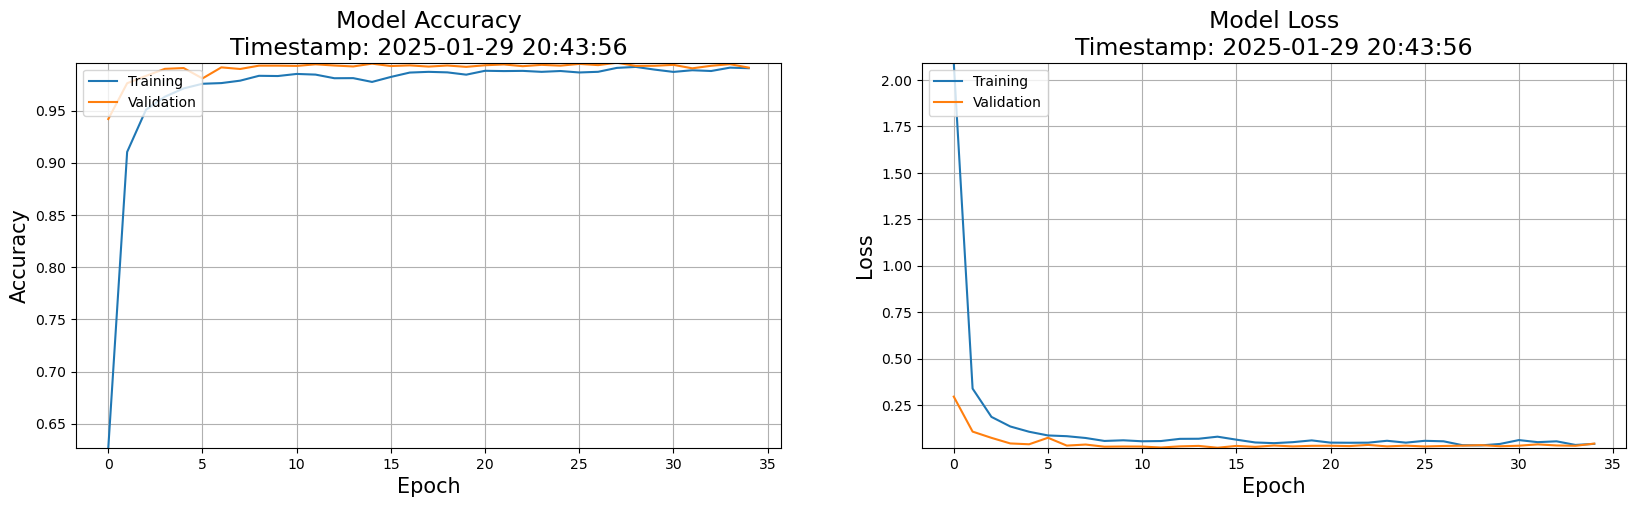

In [22]:
plot_performance(history=history1)

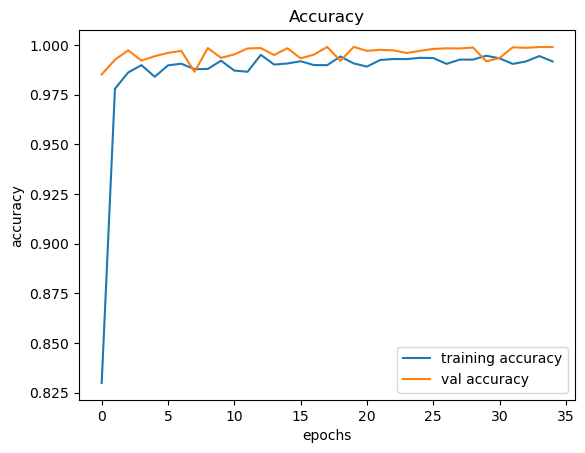

In [47]:
plt.figure(0)
plt.plot(history1.history['accuracy'], label='training accuracy')
plt.plot(history1.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

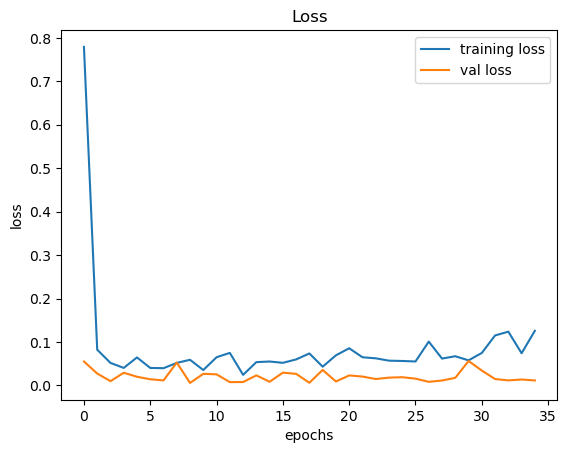

In [48]:
# Loss
plt.plot(history1.history['loss'], label='training loss')
plt.plot(history1.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
Y_test = pd.read_csv(r"C:\Users\nivedhitha\Downloads\traffic signs detection using CNN\Test.csv")

In [26]:
Y_test

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png


In [27]:
labels = Y_test["ClassId"].values
imgs = Y_test["Path"].values

In [28]:
data=[]

In [29]:
for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30))  # Resize to match input shape
    data.append(np.array(image))

In [30]:
X_test = np.array(data)

In [31]:
Y_pred = model.predict(X_test)

# Convert probabilities to class labels
pred_labels = np.argmax(Y_pred, axis=1)

# Calculate and print accuracy
print(accuracy_score(labels, pred_labels))

395/395 ━━━━━━━━━━━━━━━━━━━━ 24s 59ms/step
0.9783056215360253


In [45]:
np.save('./training/data',data)
np.save('./training/target',labels)

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
model.save("./training/TSR.h5")

In [33]:
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [34]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [35]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

In [58]:
prediction=model.predict(X_test)

395/395 ━━━━━━━━━━━━━━━━━━━━ 24s 60ms/step


In [59]:
prediction_classes=np.argmax(prediction,axis=1)

In [60]:
prediction_classes=(prediction>0.5).astype('int32')

In [72]:
import tensorflow as tf

In [80]:
prediction = test_on_img(r"C:\Users\nivedhitha\Downloads\traffic signs detection using CNN\training\4\00004_00065_00012.png")
s = [str(i) for i in prediction] 
print("Predicted traffic sign is: ", classes[s])


AttributeError: 'Sequential' object has no attribute 'predict_classes'